In [3]:
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
from torch_geometric.datasets import KarateClub

In [5]:
# Import dataset from PyTorch Geometric
dataset = KarateClub()
# Print information
print(dataset)
print('------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

KarateClub()
------------
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [6]:
# Print first element
print(f'Graph: {dataset[0]}')

Graph: Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [7]:
data = dataset[0]

In [8]:
print(f'x = {data.x.shape}')
print(data.x)

x = torch.Size([34, 34])
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


In [9]:
print(f'edge_index = {data.edge_index.shape}')
print(data.edge_index)

edge_index = torch.Size([2, 156])
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3, 

In [10]:
from torch_geometric.utils import to_dense_adj

In [11]:
A = to_dense_adj(data.edge_index)[0].numpy().astype(int)
print(f'A = {A.shape}')
print(A)

A = (34, 34)
[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


In [12]:
print(f'y = {data.y.shape}')
print(data.y)

y = torch.Size([34])
tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])


In [13]:
print(f'train_mask = {data.train_mask.shape}')
print(data.train_mask)

train_mask = torch.Size([34])
tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])


In [14]:
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


In [15]:
from torch_geometric.utils import to_networkx

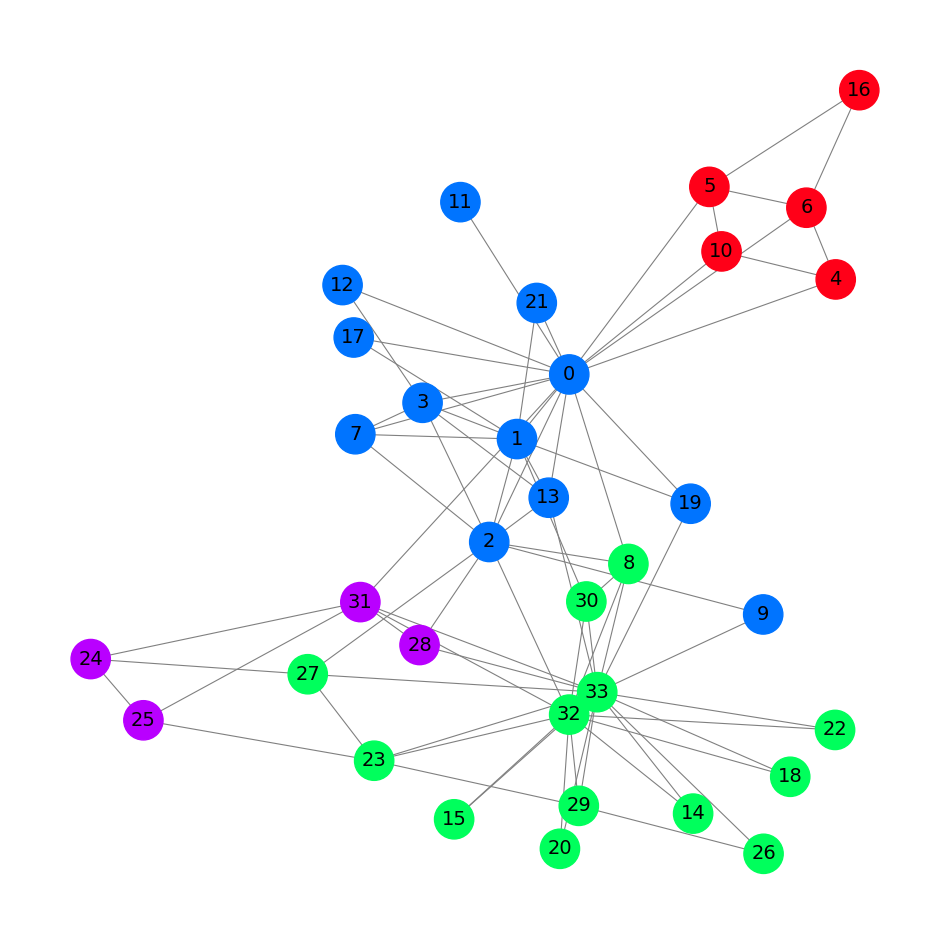

In [16]:
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                pos=nx.spring_layout(G, seed=0),
                with_labels=True,
                node_size=800,
                node_color=data.y,
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.8,
                edge_color="grey",
                font_size=14
                )
plt.show()

In [17]:
from torch.nn import Linear
from torch_geometric.nn import GCNConv

In [18]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.gcn = GCNConv(dataset.num_features, 3)
        self.out = Linear(3, dataset.num_classes)
    def forward(self, x, edge_index):
        h = self.gcn(x, edge_index).relu()
        z = self.out(h)
        return h, z
model = GCN()
print(model)

GCN(
  (gcn): GCNConv(34, 3)
  (out): Linear(in_features=3, out_features=4, bias=True)
)


In [19]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)

In [20]:
# Calculate accuracy
def accuracy(pred_y, y):
    return (pred_y == y).sum() / len(y)
# Data for animations
embeddings = []
losses = []
accuracies = []
outputs = []
# Training loop
for epoch in range(201):
    # Clear gradients
    optimizer.zero_grad()
    # Forward pass
    h, z = model(data.x, data.edge_index)
    # Calculate loss function
    loss = criterion(z, data.y)
    # Calculate accuracy
    acc = accuracy(z.argmax(dim=1), data.y)
    # Compute gradients
    loss.backward()
    # Tune parameters
    optimizer.step()
    # Store data for animations
    embeddings.append(h)
    losses.append(loss)
    accuracies.append(acc)
    outputs.append(z.argmax(dim=1))
    # Print metrics every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')

Epoch   0 | Loss: 1.37 | Acc: 35.29%
Epoch  10 | Loss: 1.24 | Acc: 35.29%
Epoch  20 | Loss: 1.05 | Acc: 64.71%
Epoch  30 | Loss: 0.88 | Acc: 73.53%
Epoch  40 | Loss: 0.78 | Acc: 73.53%
Epoch  50 | Loss: 0.72 | Acc: 73.53%
Epoch  60 | Loss: 0.67 | Acc: 73.53%
Epoch  70 | Loss: 0.61 | Acc: 73.53%
Epoch  80 | Loss: 0.54 | Acc: 85.29%
Epoch  90 | Loss: 0.48 | Acc: 85.29%
Epoch 100 | Loss: 0.41 | Acc: 85.29%
Epoch 110 | Loss: 0.33 | Acc: 85.29%
Epoch 120 | Loss: 0.25 | Acc: 85.29%
Epoch 130 | Loss: 0.19 | Acc: 85.29%
Epoch 140 | Loss: 0.13 | Acc: 100.00%
Epoch 150 | Loss: 0.08 | Acc: 100.00%
Epoch 160 | Loss: 0.04 | Acc: 100.00%
Epoch 170 | Loss: 0.03 | Acc: 100.00%
Epoch 180 | Loss: 0.02 | Acc: 100.00%
Epoch 190 | Loss: 0.01 | Acc: 100.00%
Epoch 200 | Loss: 0.01 | Acc: 100.00%


In [21]:
%%capture
from IPython.display import HTML
from matplotlib import animation
plt.rcParams["animation.bitrate"] = 3000

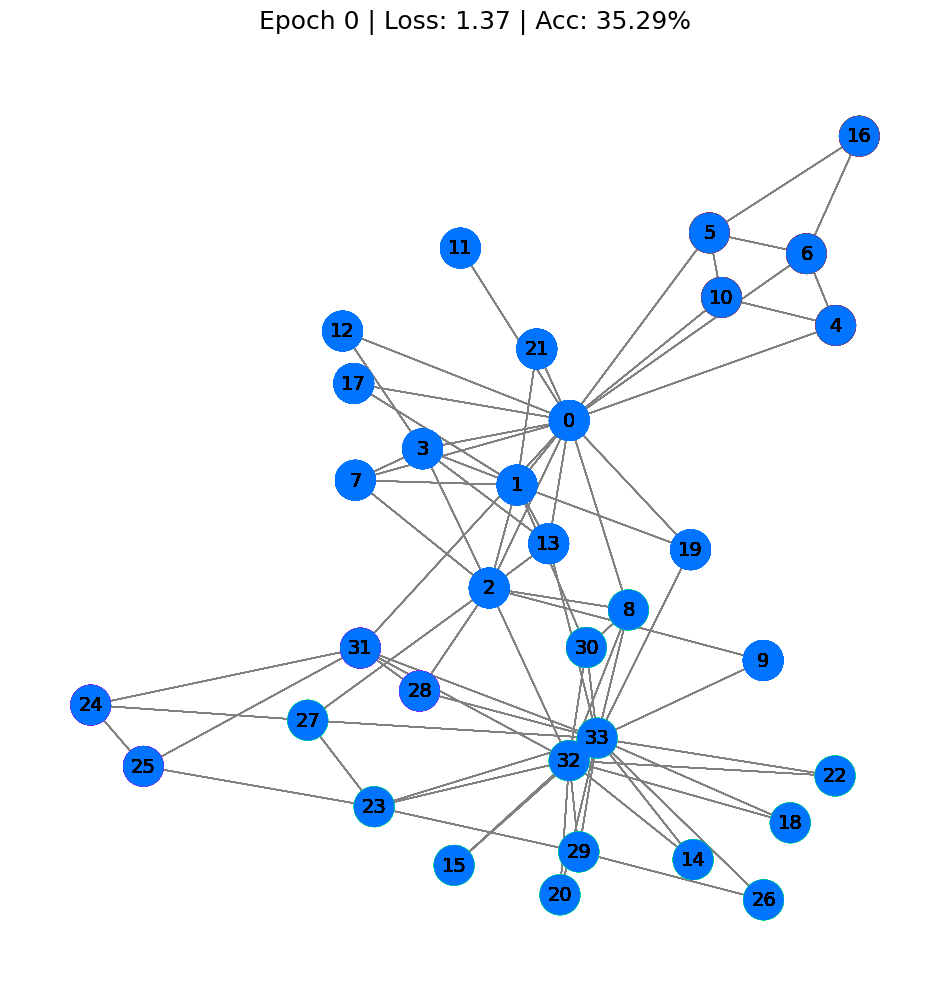

In [22]:
def animate(i):
    G = to_networkx(data, to_undirected=True)
    nx.draw_networkx(G,
                    pos=nx.spring_layout(G, seed=0),
                    with_labels=True,
                    node_size=800,
                    node_color=outputs[i],
                    cmap="hsv",
                    vmin=-2,
                    vmax=3,
                    width=0.8,
                    edge_color="grey",
                    font_size=14
                    )
    plt.title(f'Epoch {i} | Loss: {losses[i]:.2f} | Acc: {accuracies[i]*100:.2f}%',
              fontsize=18, pad=20)
fig = plt.figure(figsize=(12, 12))
plt.axis('off')
anim = animation.FuncAnimation(fig, animate, \
            np.arange(0, 200, 10), interval=500, repeat=True)
html = HTML(anim.to_html5_video())
display(html)

In [23]:
# Print embeddings
print(f'Final embeddings = {h.shape}')
print(h)

Final embeddings = torch.Size([34, 3])
tensor([[1.5746e+00, 2.2597e+00, 1.6341e+00],
        [1.8662e+00, 2.1463e+00, 2.3735e+00],
        [1.5661e+00, 1.2868e+00, 2.0116e+00],
        [1.9763e+00, 1.9679e+00, 2.2324e+00],
        [2.1547e-04, 1.1708e+00, 0.0000e+00],
        [0.0000e+00, 1.2771e+00, 0.0000e+00],
        [0.0000e+00, 1.2347e+00, 0.0000e+00],
        [1.6702e+00, 1.7765e+00, 1.8430e+00],
        [3.3338e-02, 8.8888e-02, 1.5116e+00],
        [1.2902e+00, 1.3282e+00, 1.7741e+00],
        [0.0000e+00, 1.1813e+00, 0.0000e+00],
        [1.7461e+00, 1.6417e+00, 1.7779e+00],
        [1.6634e+00, 1.6006e+00, 1.8553e+00],
        [1.5586e+00, 1.4181e+00, 1.9177e+00],
        [3.8588e-04, 2.4674e-03, 1.6074e+00],
        [0.0000e+00, 2.9348e-03, 1.5946e+00],
        [0.0000e+00, 1.1508e+00, 0.0000e+00],
        [1.5094e+00, 1.7330e+00, 1.7709e+00],
        [0.0000e+00, 0.0000e+00, 1.6026e+00],
        [1.4988e+00, 1.3798e+00, 1.8182e+00],
        [0.0000e+00, 0.0000e+00, 1.5636e+

In [24]:
# Get first embedding at epoch = 0
embed = h.detach().cpu().numpy()

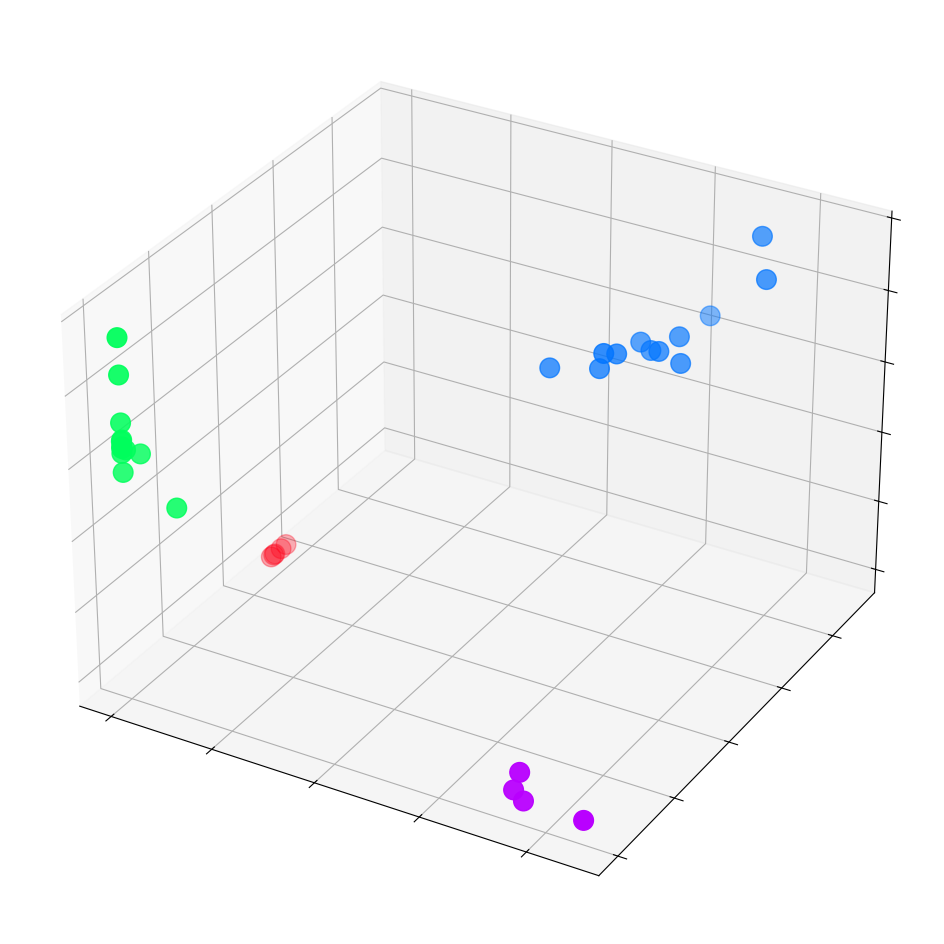

In [25]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.patch.set_alpha(0)
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
ax.scatter(embed[:, 0], embed[:, 1], embed[:, 2],
           s=200, c=data.y, cmap="hsv", vmin=-2, vmax=3)
plt.show()

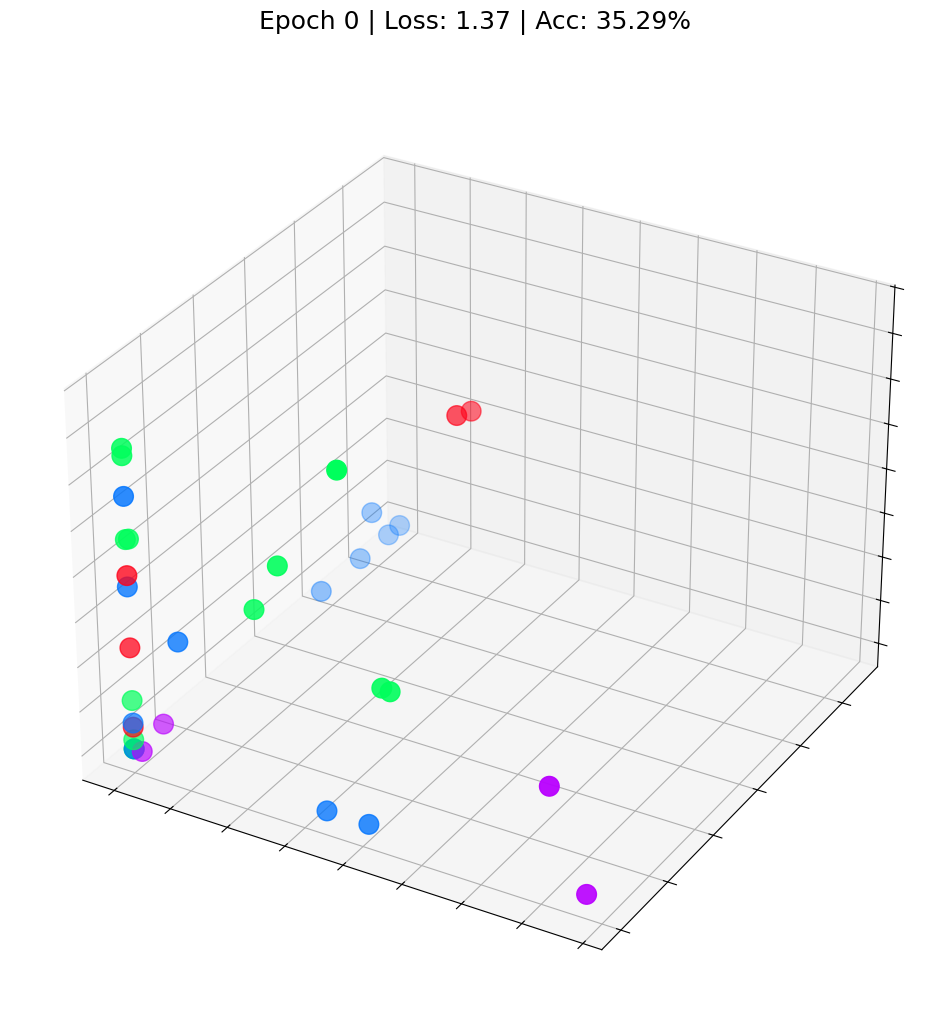

In [26]:
def animate(i):
    embed = embeddings[i].detach().cpu().numpy()
    ax.clear()
    ax.scatter(embed[:, 0], embed[:, 1], embed[:, 2],
           s=200, c=data.y, cmap="hsv", vmin=-2, vmax=3)
    plt.title(f'Epoch {i} | Loss: {losses[i]:.2f} | Acc: {accuracies[i]*100:.2f}%',
              fontsize=18, pad=40)
fig = plt.figure(figsize=(12, 12))
plt.axis('off')
ax = fig.add_subplot(projection='3d')
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
anim = animation.FuncAnimation(fig, animate, \
              np.arange(0, 200, 10), interval=800, repeat=True)
html = HTML(anim.to_html5_video())
display(html)


Epoch 1/200, Loss: 0.6902
Epoch 21/200, Loss: 0.6530
Epoch 41/200, Loss: 0.6460
Epoch 61/200, Loss: 0.6440
Epoch 81/200, Loss: 0.6407
Epoch 101/200, Loss: 0.6335
Epoch 121/200, Loss: 0.6222
Epoch 141/200, Loss: 0.6078
Epoch 161/200, Loss: 0.5925
Epoch 181/200, Loss: 0.5776
Accuracy: 75.00%


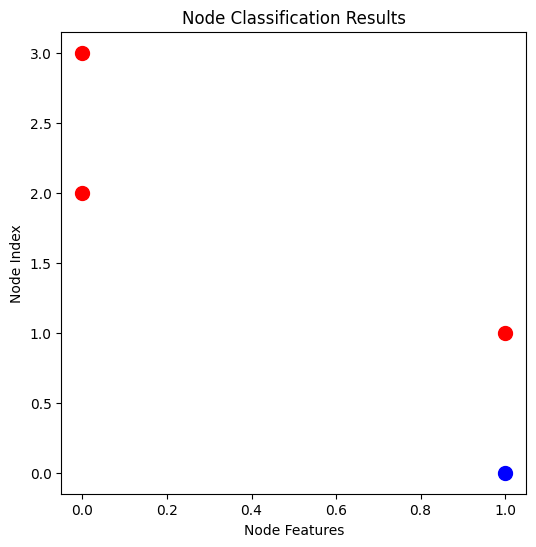

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt

# Step 1: Create a simple graph dataset
# Example: A graph with 4 nodes, and edges (0-1, 1-2, 2-3)
# Nodes will have 1 feature each, and we will classify the nodes into 2 classes.

# Define the edge indices (connections between nodes)
# Edges are in the form of pairs of node indices
edge_index = torch.tensor([
    [0, 1, 1, 2, 2, 3],
    [1, 0, 2, 1, 3, 2]
], dtype=torch.long)

# Node features (4 nodes, 1 feature each)
x = torch.tensor([[1], [1], [0], [0]], dtype=torch.float)

# Labels for nodes (classification target, e.g., 0 or 1 for binary classification)
y = torch.tensor([0, 1, 0, 1], dtype=torch.long)

# Create a PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, y=y)

# Step 2: Define the GCN Model
class GCN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCN, self).__init__()
        # Define two graph convolutional layers
        self.conv1 = GCNConv(in_channels, 16)  # First GCN layer with 16 output features
        self.conv2 = GCNConv(16, out_channels)  # Second GCN layer with output features equal to number of classes

    def forward(self, data):
        # Apply first GCN layer followed by ReLU activation
        x = F.relu(self.conv1(data.x, data.edge_index))
        # Apply second GCN layer (final output)
        x = self.conv2(x, data.edge_index)
        return x

# Step 3: Instantiate the model, define loss and optimizer
model = GCN(in_channels=1, out_channels=2)  # 1 input feature, 2 output classes (binary classification)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Step 4: Training the model
def train(model, data, optimizer, criterion, epochs=200):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()  # Clear gradients
        out = model(data)  # Forward pass
        loss = criterion(out, data.y)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update parameters

        if epoch % 20 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Train the model
train(model, data, optimizer, criterion)

# Step 5: Evaluate the model
model.eval()
with torch.no_grad():  # Disable gradient computation during inference
    out = model(data)
    _, pred = out.max(dim=1)  # Get the class with the highest score
    accuracy = (pred == data.y).sum().item() / data.num_nodes  # Calculate accuracy
    print(f'Accuracy: {accuracy * 100:.2f}%')

# Step 6: Visualize the graph with node classification
plt.figure(figsize=(6, 6))
for i in range(data.num_nodes):
    plt.scatter(data.x[i, 0].item(), i, color='r' if pred[i] == 1 else 'b', s=100, label=f'Node {i+1}')
plt.title('Node Classification Results')
plt.xlabel('Node Features')
plt.ylabel('Node Index')
plt.show()


Epoch 1/200, Loss: 0.7156
Epoch 21/200, Loss: 0.6830
Epoch 41/200, Loss: 0.6661
Epoch 61/200, Loss: 0.6521
Epoch 81/200, Loss: 0.6472
Epoch 101/200, Loss: 0.6465
Epoch 121/200, Loss: 0.6465
Epoch 141/200, Loss: 0.6465
Epoch 161/200, Loss: 0.6464
Epoch 181/200, Loss: 0.6465
Accuracy: 50.00%


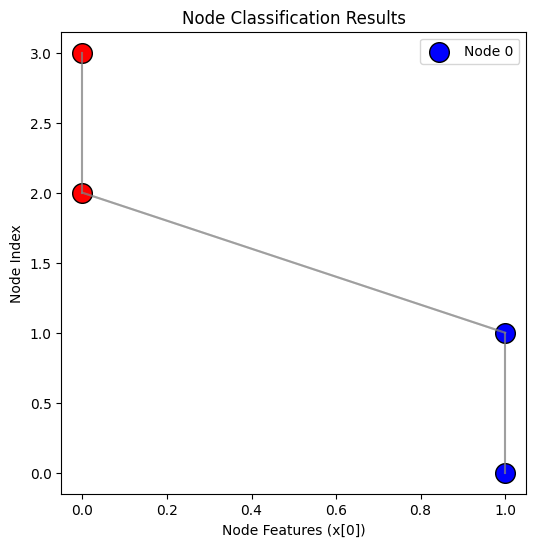

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt

# Step 1: Create a simple graph dataset
# Example: A graph with 4 nodes, and edges (0-1, 1-2, 2-3)
edge_index = torch.tensor([
    [0, 1, 1, 2, 2, 3],
    [1, 0, 2, 1, 3, 2]
], dtype=torch.long)

# Node features (4 nodes, 1 feature each)
x = torch.tensor([[1], [1], [0], [0]], dtype=torch.float)

# Labels for nodes (classification target, e.g., 0 or 1 for binary classification)
y = torch.tensor([0, 1, 0, 1], dtype=torch.long)

# Create a PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, y=y)

# Step 2: Define the GCN Model
class GCN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCN, self).__init__()
        # Define two graph convolutional layers
        self.conv1 = GCNConv(in_channels, 16)  # First GCN layer with 16 output features
        self.conv2 = GCNConv(16, out_channels)  # Second GCN layer with output features equal to number of classes

    def forward(self, data):
        # Apply first GCN layer followed by ReLU activation
        x = F.relu(self.conv1(data.x, data.edge_index))
        # Apply second GCN layer (final output)
        x = self.conv2(x, data.edge_index)
        return x

# Step 3: Instantiate the model, define loss and optimizer
model = GCN(in_channels=1, out_channels=2)  # 1 input feature, 2 output classes (binary classification)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Step 4: Training the model
def train(model, data, optimizer, criterion, epochs=200):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()  # Clear gradients
        out = model(data)  # Forward pass
        loss = criterion(out, data.y)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update parameters

        if epoch % 20 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Train the model
train(model, data, optimizer, criterion)

# Step 5: Evaluate the model
model.eval()
with torch.no_grad():  # Disable gradient computation during inference
    out = model(data)
    _, pred = out.max(dim=1)  # Get the class with the highest score
    accuracy = (pred == data.y).sum().item() / data.num_nodes  # Calculate accuracy
    print(f'Accuracy: {accuracy * 100:.2f}%')

# Step 6: Visualize the graph with node classification
plt.figure(figsize=(6, 6))

# Extract node positions (for simplicity, we use node indices as y-coordinates)
node_positions = {i: (data.x[i, 0].item(), i) for i in range(data.num_nodes)}

# Plot edges
for i, j in data.edge_index.t():  # Iterate over edges
    src, tgt = node_positions[i.item()], node_positions[j.item()]
    plt.plot([src[0], tgt[0]], [src[1], tgt[1]], 'gray', alpha=0.5)

# Plot nodes
for i in range(data.num_nodes):
    plt.scatter(
        node_positions[i][0], node_positions[i][1], 
        color='r' if pred[i] == 1 else 'b', 
        s=200, edgecolor='k', label=f'Node {i}' if i == 0 else ""  # Add labels for one node to avoid duplicates
    )

# Adjust legend and plot
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title('Node Classification Results')
plt.xlabel('Node Features (x[0])')
plt.ylabel('Node Index')
plt.show()


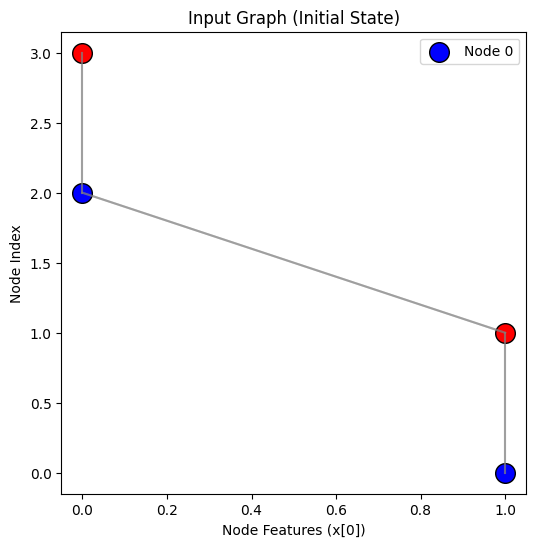

Epoch 1/200, Loss: 0.6909
Epoch 21/200, Loss: 0.6623
Epoch 41/200, Loss: 0.6464
Epoch 61/200, Loss: 0.6438
Epoch 81/200, Loss: 0.6412
Epoch 101/200, Loss: 0.6368
Epoch 121/200, Loss: 0.6292
Epoch 141/200, Loss: 0.6185
Epoch 161/200, Loss: 0.6067
Epoch 181/200, Loss: 0.5944
Accuracy: 75.00%


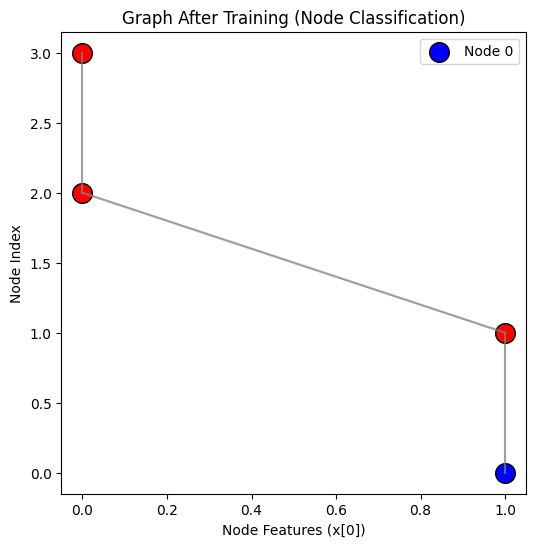

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt

# Step 1: Create a simple graph dataset
# Example: A graph with 4 nodes, and edges (0-1, 1-2, 2-3)
edge_index = torch.tensor([
    [0, 1, 1, 2, 2, 3],
    [1, 0, 2, 1, 3, 2]
], dtype=torch.long)

# Node features (4 nodes, 1 feature each)
x = torch.tensor([[1], [1], [0], [0]], dtype=torch.float)

# Labels for nodes (classification target, e.g., 0 or 1 for binary classification)
y = torch.tensor([0, 1, 0, 1], dtype=torch.long)

# Create a PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, y=y)

# Step 2: Define the GCN Model
class GCN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCN, self).__init__()
        # Define two graph convolutional layers
        self.conv1 = GCNConv(in_channels, 16)  # First GCN layer with 16 output features
        self.conv2 = GCNConv(16, out_channels)  # Second GCN layer with output features equal to number of classes

    def forward(self, data):
        # Apply first GCN layer followed by ReLU activation
        x = F.relu(self.conv1(data.x, data.edge_index))
        # Apply second GCN layer (final output)
        x = self.conv2(x, data.edge_index)
        return x

# Step 3: Instantiate the model, define loss and optimizer
model = GCN(in_channels=1, out_channels=2)  # 1 input feature, 2 output classes (binary classification)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Step 4: Training the model
def train(model, data, optimizer, criterion, epochs=200):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()  # Clear gradients
        out = model(data)  # Forward pass
        loss = criterion(out, data.y)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update parameters

        if epoch % 20 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Function to visualize the graph
def visualize_graph(data, title, labels=None, predictions=None):
    plt.figure(figsize=(6, 6))

    # Extract node positions (for simplicity, we use node indices as y-coordinates)
    node_positions = {i: (data.x[i, 0].item(), i) for i in range(data.num_nodes)}

    # Plot edges
    for i, j in data.edge_index.t():  # Iterate over edges
        src, tgt = node_positions[i.item()], node_positions[j.item()]
        plt.plot([src[0], tgt[0]], [src[1], tgt[1]], 'gray', alpha=0.5)

    # Plot nodes
    for i in range(data.num_nodes):
        color = 'b'  # Default color
        if labels is not None:
            color = 'r' if labels[i] == 1 else 'b'
        if predictions is not None:
            color = 'r' if predictions[i] == 1 else 'b'

        plt.scatter(
            node_positions[i][0], node_positions[i][1],
            color=color, s=200, edgecolor='k', label=f'Node {i}' if i == 0 else ""
        )

    # Adjust legend and plot
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.title(title)
    plt.xlabel('Node Features (x[0])')
    plt.ylabel('Node Index')
    plt.show()

# Visualize the graph before training
visualize_graph(data, "Input Graph (Initial State)", labels=data.y)

# Train the model
train(model, data, optimizer, criterion)

# Step 5: Evaluate the model
model.eval()
with torch.no_grad():  # Disable gradient computation during inference
    out = model(data)
    _, pred = out.max(dim=1)  # Get the class with the highest score
    accuracy = (pred == data.y).sum().item() / data.num_nodes  # Calculate accuracy
    print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualize the graph after training
visualize_graph(data, "Graph After Training (Node Classification)", predictions=pred)


Epoch 0, Loss: 0.6760
Epoch 20, Loss: 0.5636
Epoch 40, Loss: 0.4473
Epoch 60, Loss: 0.3303
Epoch 80, Loss: 0.2459
Epoch 100, Loss: 0.1958
Epoch 120, Loss: 0.1620
Epoch 140, Loss: 0.1347
Epoch 160, Loss: 0.1112
Epoch 180, Loss: 0.0913


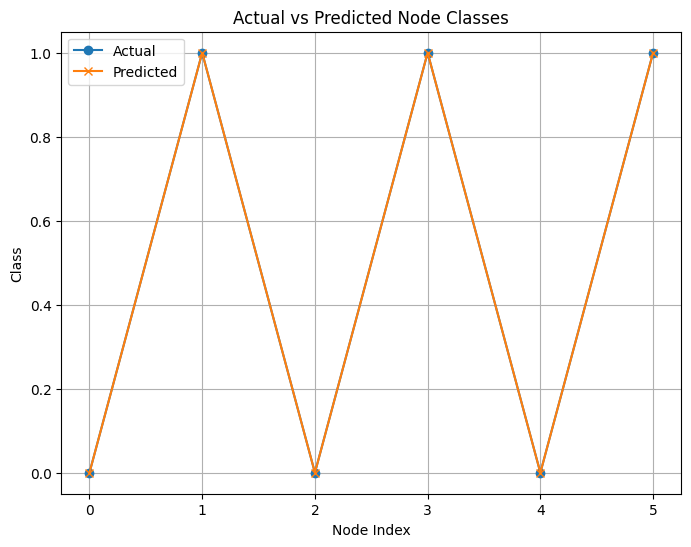

The Actual vs Predicted Node Classes plot has been saved as 'actual_vs_predicted_node.png'.


<Figure size 640x480 with 0 Axes>

In [4]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import matplotlib.pyplot as plt

#GNN model
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        # First GCN layer with ReLU activation
        x = self.conv1(x, edge_index)
        x = F.relu(x)

        # Second GCN layer
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

#generate simple graph
def create_sample_graph():
    #edges of the graph (source and target)
    edge_index = torch.tensor([
        [0, 1, 1, 2, 3, 3],  #source nodes
        [1, 0, 2, 1, 4, 5]   #target nodes
    ], dtype=torch.long)

    #node features(6 nodes, 3 features per node)
    x = torch.tensor([
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 1, 0],
        [1, 0, 1],
        [0, 1, 1]
    ], dtype=torch.float)

    #node labels (for classification)
    y = torch.tensor([0, 1, 0, 1, 0, 1], dtype=torch.long)

    return Data(x=x, edge_index=edge_index, y=y)

# train the GNN model
def train():
    #create graph data
    data = create_sample_graph()

    #define the model
    input_dim = data.x.size(1)
    hidden_dim = 16
    output_dim = 2  #number of classes
    model = GCN(input_dim, hidden_dim, output_dim)

    #define optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

    #training loop
    model.train()
    for epoch in range(200):
        optimizer.zero_grad()
        out = model(data)
        loss = F.nll_loss(out, data.y)
        loss.backward()
        optimizer.step()

        if epoch % 20 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

    #evaluate model
    model.eval()
    _, pred = model(data).max(dim=1)

    # Plot actual vs. predicted
    plt.figure(figsize=(8, 6))
    plt.plot(data.y.numpy(), label="Actual", marker='o')
    plt.plot(pred.numpy(), label="Predicted", marker='x')
    plt.xlabel("Node Index")
    plt.ylabel("Class")
    plt.title("Actual vs Predicted Node Classes")
    plt.legend()
    plt.grid(True)
    plt.show()
    plt.savefig('actual_vs_predicted_node.png')
    print("actual_vs_predicted_node.png")

#run the training
if __name__ == "__main__":
    train()

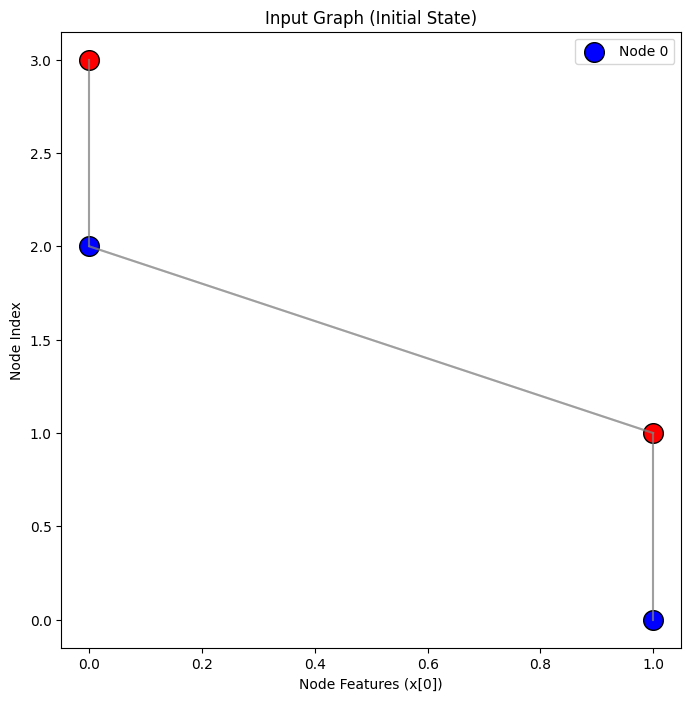

Epoch 1/1000, Loss: 0.6929
Epoch 21/1000, Loss: 0.6593
Epoch 41/1000, Loss: 0.6468
Epoch 61/1000, Loss: 0.6447
Epoch 81/1000, Loss: 0.6416
Epoch 101/1000, Loss: 0.6348
Epoch 121/1000, Loss: 0.6232
Epoch 141/1000, Loss: 0.6098
Epoch 161/1000, Loss: 0.5954
Epoch 181/1000, Loss: 0.5800
Epoch 201/1000, Loss: 0.5663
Epoch 221/1000, Loss: 0.5548
Epoch 241/1000, Loss: 0.5455
Epoch 261/1000, Loss: 0.5381
Epoch 281/1000, Loss: 0.5324
Epoch 301/1000, Loss: 0.5275
Epoch 321/1000, Loss: 0.5238
Epoch 341/1000, Loss: 0.5213
Epoch 361/1000, Loss: 0.5191
Epoch 381/1000, Loss: 0.5172
Epoch 401/1000, Loss: 0.5159
Epoch 421/1000, Loss: 0.5148
Epoch 441/1000, Loss: 0.5138
Epoch 461/1000, Loss: 0.5133
Epoch 481/1000, Loss: 0.5126
Epoch 501/1000, Loss: 0.5121
Epoch 521/1000, Loss: 0.5118
Epoch 541/1000, Loss: 0.5115
Epoch 561/1000, Loss: 0.5112
Epoch 581/1000, Loss: 0.5109
Epoch 601/1000, Loss: 0.5108
Epoch 621/1000, Loss: 0.5107
Epoch 641/1000, Loss: 0.5105
Epoch 661/1000, Loss: 0.5105
Epoch 681/1000, Loss

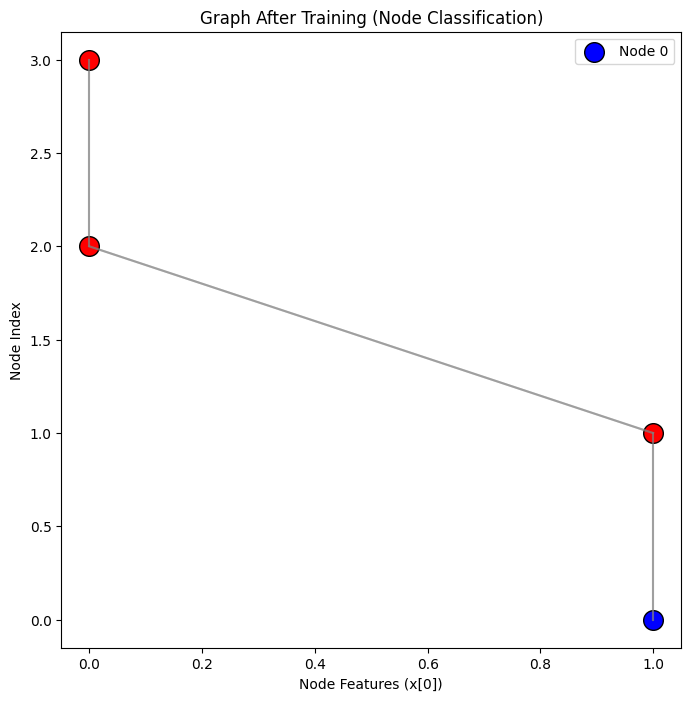

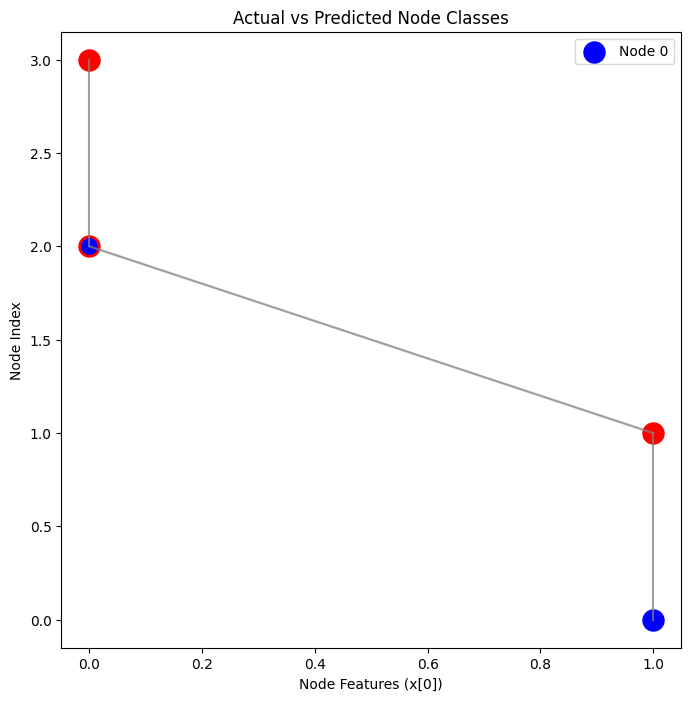

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt

# Step 1: Create a simple graph dataset
edge_index = torch.tensor([
    [0, 1, 1, 2, 2, 3],
    [1, 0, 2, 1, 3, 2]
], dtype=torch.long)

# Node features (4 nodes, 1 feature each)
x = torch.tensor([[1], [1], [0], [0]], dtype=torch.float)

# Labels for nodes (classification target, e.g., 0 or 1 for binary classification)
y = torch.tensor([0, 1, 0, 1], dtype=torch.long)

# Create a PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, y=y)

# Step 2: Define the GCN Model
class GCN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, 16)  # First GCN layer with 16 output features
        self.conv2 = GCNConv(16, out_channels)  # Second GCN layer with output features equal to number of classes

    def forward(self, data):
        x = F.relu(self.conv1(data.x, data.edge_index))  # Apply first GCN layer + ReLU
        x = self.conv2(x, data.edge_index)  # Apply second GCN layer
        return x

# Step 3: Instantiate the model, define loss and optimizer
model = GCN(in_channels=1, out_channels=2)  # 1 input feature, 2 output classes
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Step 4: Training the model
def train(model, data, optimizer, criterion, epochs=1000):
    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()  # Clear gradients
        out = model(data)  # Forward pass
        loss = criterion(out, data.y)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update parameters

        if epoch % 20 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Function to visualize the graph
def visualize_graph(data, title, labels=None, predictions=None, show_comparison=False):
    plt.figure(figsize=(8, 8))

    # Extract node positions (for simplicity, use node indices as y-coordinates)
    node_positions = {i: (data.x[i, 0].item(), i) for i in range(data.num_nodes)}

    # Plot edges
    for i, j in data.edge_index.t():  # Iterate over edges
        src, tgt = node_positions[i.item()], node_positions[j.item()]
        plt.plot([src[0], tgt[0]], [src[1], tgt[1]], 'gray', alpha=0.5)

    # Plot nodes
    for i in range(data.num_nodes):
        if show_comparison:
            # Use dual colors: actual label as fill, predicted as edge
            fill_color = 'r' if labels[i] == 1 else 'b'
            edge_color = 'r' if predictions[i] == 1 else 'b'
            plt.scatter(
                node_positions[i][0], node_positions[i][1],
                color=fill_color, s=200, edgecolor=edge_color, linewidth=2,
                label=f'Node {i}' if i == 0 else ""
            )
        else:
            color = 'r' if (predictions[i] if predictions is not None else labels[i]) == 1 else 'b'
            plt.scatter(
                node_positions[i][0], node_positions[i][1],
                color=color, s=200, edgecolor='k', label=f'Node {i}' if i == 0 else ""
            )

    # Adjust legend and plot
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.title(title)
    plt.xlabel('Node Features (x[0])')
    plt.ylabel('Node Index')
    plt.show()

# Visualize the graph before training
visualize_graph(data, "Input Graph (Initial State)", labels=data.y)

# Train the model
train(model, data, optimizer, criterion)

# Step 5: Evaluate the model
model.eval()
with torch.no_grad():  # Disable gradient computation during inference
    out = model(data)
    _, pred = out.max(dim=1)  # Get the class with the highest score
    accuracy = (pred == data.y).sum().item() / data.num_nodes  # Calculate accuracy
    print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualize the graph after training
visualize_graph(data, "Graph After Training (Node Classification)", predictions=pred)

# Visualize actual vs predicted node classes
visualize_graph(data, "Actual vs Predicted Node Classes", labels=data.y, predictions=pred, show_comparison=True)
